Dataset do Kaggle:Salary

# Importações

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import math
from sklearn import model_selection, linear_model, metrics
%matplotlib inline

In [3]:
data_raw = pd.read_csv('Salary.csv')
data_raw.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# Verificando dados inconsistentes

In [5]:
data_raw.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [6]:
data_raw.duplicated().sum()

0

In [7]:
data_raw.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Conforme verificado não há nenhuma inconsistencia ou dados faltantes, então podemos atribuir ao DataFrame definitivo

In [8]:
df = data_raw

# Exploração dos dados

In [9]:
df.shape

(35, 2)

In [10]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


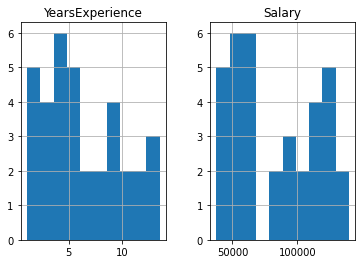

In [14]:
df.hist(figsize=(6,4));

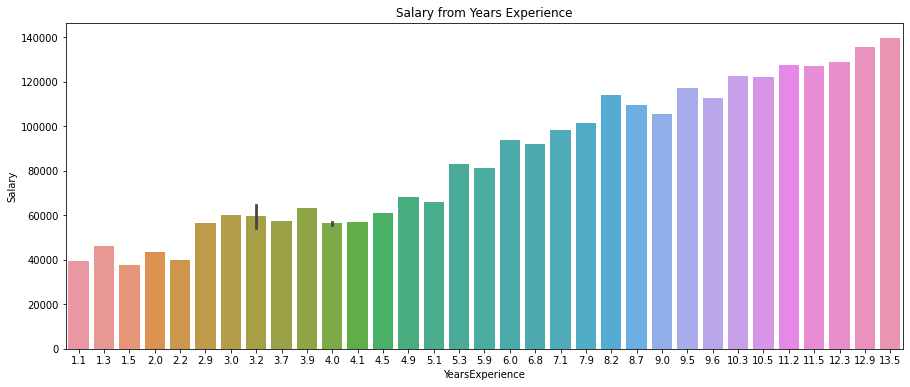

In [24]:
plt.figure(figsize=(15,6))
plt.title('Salary from Years Experience')
sns.barplot(x=df['YearsExperience'], y=df['Salary']);

Conforme verificado nos gráficos Histograma e de Barras acima, os dados estão bem distribuidos

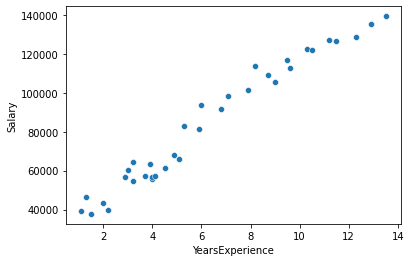

In [29]:
sns.scatterplot(x=df['YearsExperience'], y=df['Salary']);

O gráfico de disperção mostra que há uma linearidade entre os dados

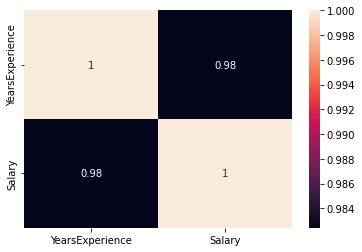

In [32]:
sns.heatmap(df.corr(), annot=True);

A correlação entre as colunas é alta acima de 0.7

In [35]:
math.pow(0.98, 2)

0.9603999999999999

O coeficiente de determinação esta acima de 0.3 indica que 96% dos salarios podem ser explicados pelos anos de experiência

# Treinando o modelo

In [41]:
x = df['YearsExperience'].values
x = x.reshape(-1, 1)
y = df['Salary'].values
x.shape, y.shape

((35, 1), (35,))

In [44]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28, 1), (7, 1), (28,), (7,))

In [45]:
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [52]:
#b1 (coeficiente)
print(f'Coefficients:{regressor.coef_}')
#b0 (constante)
print(f'Intercept:{regressor.intercept_}')

Coefficients:[8703.14521572]
Intercept:28838.060447859105


Agora que encontramos o coeficiente e a constante poderemos executar a operação de previsão (previsão salário) = constante + coeficiente * (anos de experiência)

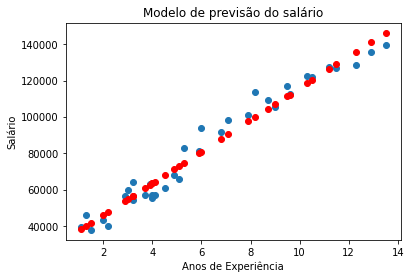

In [59]:
plt.scatter(x, y)
plt.plot(x, regressor.predict(x), 'o', color='red')
plt.title('Modelo de previsão do salário')
plt.ylabel('Salário')
plt.xlabel('Anos de Experiência');

# Métricas de erro

In [63]:
previsao = regressor.predict(x_test)

In [64]:
# Mean Absolute Erro
metrics.mean_absolute_error(y_test, previsao)

5313.973964525432

In [68]:
# Root Mean Squared Error
math.sqrt(metrics.mean_squared_error(y_test, previsao))

6348.866720688848

In [67]:
# R2 Score
metrics.r2_score(y_test, previsao)

0.9593108462602296

Conforme análise, o MAE e o RMSE mostram valores pequenos das diferenças de valores reais para os de previsão, e o R2 Score mostra o quão próximos os pontos de dados estão da linha de regressão ajustada. Quanto mais alto o valor de R quadrado, melhor o modelo se ajusta aos dados.